In [593]:
from IPython.display import display, Math, Latex

import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import random

# Assignment 3: Diversification

Name: Arion Harinarain

Student Number: 21002933

Due: 2021/11/07 at 11:59pm on Dropbox

What to submit: both your .ipynb and .pdf files.

Please make sure that each question outputs onto a new page. 
You can do this by inserting a code chunk with the following after each question.
```
%%latex
\newpage
```

### As a note to whomever reviews this assignment, the ticker IPL.TO was delisted from the stock exchange on Nov. 2021, as a consquence there is no data beyond this for IPL.TO. Hence, many of my dataframes will end on Nov. 2021, instead of Dec. 2021.

## Rules
* You can follow the format of the template notebook to complete this assignment
* Make sure to define any new variables and functions that you are using. If you are doubtful whether you should explain a part of your code, it is better to explain it. 
* Please make sure to conclude your final answers in a statement (if applicable) at the end of each question.

## Objectives
At the end of the assignment, you will:
* Understand the value of diversification within a portfolio
* Understand how to improve diversification
* Understand the sharpe ratio and how it can be used to find a desireable portfolio

### Data 

For this assignment, you will be using **Industries.csv**, as well as **Yahoo Finance** (yfinance). This will be used to collect the share information, and then you will use Python to complete the remainder of the assignment. 

**Language:** Python 

**Libraries Allowed:** pandas, matplotlib, yfinance, random

## Q1 - Within-Industry Diversification
We will begin with exploring how diversification within industries can affect the portfolio value. For this question, you will be using stocks in the `industries.csv` file. 

### a)  Single Industry
#### i. 
You will begin with the technology industry. Pick 5 random stocks from that industry and list them the stocks and the industry. 

To pick the 5 random stocks, you are to use write a random_selection function, the specifics of which are given to you.

Extract the historical closing prices for each stock from `2019-01-01` to `2021-12-01` inclusive from Yahoo Finance. We will only be interested in monthly data, so include only the data from the first available day in any given month. Form an equally weighted porfolio where the initial investment size is $\$10,000$ (thus, you will put the same amount of money in each stock).  Once the portoflio is formed, you will not need to rebalance it due to changing stock prices. Track the value of the portfolio over time and  convert the value to percentage returns.

Demonstrate convincingly the concept of diversification.  This can involve calculations, graphs, and should end with a discussion. 

In [594]:
def random_selection(df, industry_name, n, seed):
    ''' 
    Params:
        df (DataFrame): DataFrame with the industries and tickers
        industry (Str): Industry in which the random drawing will take place
        n (Int): Sample size 
        seed (Int): You will call this function with the INT as your student number, this will produce the same results each time.
    Insert your dataframe into this function and the sample size and it will output the tickers as a list.
    '''
    
    #Create a List called "ticker_1st" which will contain all of the firms in the given industy
    
    ticker_lst = list(df[df.industry == industry_name].ticker)

    random.seed(seed)
    return random.sample(ticker_lst, n)

In [595]:
# Making a Function Call, and getting five tickers from the technology industry
tickers = random_selection(pd.read_csv('industries.csv'), "Technology", 5, 21002933)
tickers

['CSU.TO', 'DSG.TO', 'CTS.TO', 'ENGH.TO', 'CAE.TO']

In [596]:
# Declaring initial capital
capital = 10000

# Storing the Tickers as variables
ticker1 = tickers[0]
ticker2 = tickers[1]
ticker3 = tickers[2]
ticker4 = tickers[3]
ticker5 = tickers[4]

# Retrieving Data from yahoo finance
csu = yf.Ticker(ticker1)
dsg = yf.Ticker(ticker2)
cts = yf.Ticker(ticker3)
engh = yf.Ticker(ticker4)
cae = yf.Ticker(ticker5)

# Specifying a Start and End Date
start_date = '2019-01-01'
end_date = '2021-12-02'

# Retrieving Historical Data
csuHist = csu.history(start=start_date, end=end_date, interval="1mo")
dsgHist = dsg.history(start=start_date, end=end_date, interval="1mo")
ctsHist = cts.history(start=start_date, end=end_date, interval="1mo")
enghHist = engh.history(start=start_date, end=end_date, interval="1mo")
caeHist = cae.history(start=start_date, end=end_date, interval="1mo")

# Formatting
csuHist.dropna(inplace=True)
dsgHist.dropna(inplace=True)
ctsHist.dropna(inplace=True)
enghHist.dropna(inplace=True)
caeHist.dropna(inplace=True)

# Creating our dataframes
csudf = pd.DataFrame({'Date': csuHist.index.values,
                      'CSU.TO_Price': csuHist.Close.values})

dsgdf = pd.DataFrame({'Date': dsgHist.index.values,
                      'DSG.TO_Price': dsgHist.Close.values})

ctsdf = pd.DataFrame({'Date': ctsHist.index.values,
                      'CTS.TO_Price': ctsHist.Close.values})

enghdf = pd.DataFrame({'Date': enghHist.index.values,
                      'ENGH.TO_Price': enghHist.Close.values})

caedf = pd.DataFrame({'Date': caeHist.index.values,
                      'CAE.TO_Price': caeHist.Close.values})

# Formatting
csudf.set_index('Date', inplace=True)
dsgdf.set_index('Date', inplace=True)
ctsdf.set_index('Date', inplace=True)
enghdf.set_index('Date', inplace=True)
caedf.set_index('Date', inplace=True)

# Creating a singular DataFrame with all values
Portfolio = pd.concat([csudf, dsgdf, ctsdf, enghdf, caedf], join='inner', axis=1)

# Specifying an amount for an equally weighted portfolio
amountPerStock = capital/5

# Calculating the number of shares for each stock, given the equal weight
numSharesCSU = amountPerStock/Portfolio.loc['2019-01-01', 'CSU.TO_Price']
numSharesDSG = amountPerStock/Portfolio.loc['2019-01-01', 'DSG.TO_Price']
numSharesCTS = amountPerStock/Portfolio.loc['2019-01-01', 'CTS.TO_Price']
numSharesENGH = amountPerStock/Portfolio.loc['2019-01-01', 'ENGH.TO_Price']
numSharesCAE = amountPerStock/Portfolio.loc['2019-01-01', 'CAE.TO_Price']

# Adding that Data to our DataFrame
Portfolio['Amount_Shares_CSU'] = numSharesCSU
Portfolio['Amount_Shares_DSG'] = numSharesDSG
Portfolio['Amount_Shares_CTS'] = numSharesCTS
Portfolio['Amount_Shares_ENGH'] = numSharesENGH
Portfolio['Amount_Shares_CAE'] = numSharesCAE

# Calculating the individual position value of each stock
Portfolio['CSU_Position_Value'] = Portfolio['CSU.TO_Price'] * Portfolio['Amount_Shares_CSU']
Portfolio['DSG_Position_Value'] = Portfolio['DSG.TO_Price'] * Portfolio['Amount_Shares_DSG']
Portfolio['CTS_Position_Value'] = Portfolio['CTS.TO_Price'] * Portfolio['Amount_Shares_CTS']
Portfolio['ENGH_Position_Value'] = Portfolio['ENGH.TO_Price'] * Portfolio['Amount_Shares_ENGH']
Portfolio['CAE_Position_Value'] = Portfolio['CAE.TO_Price'] * Portfolio['Amount_Shares_CAE']

# Adding them together to get a total portfolio value
Portfolio['Portfolio_Value'] = Portfolio['CSU_Position_Value'] + Portfolio['DSG_Position_Value'] + Portfolio['CTS_Position_Value'] + Portfolio['ENGH_Position_Value'] + Portfolio['CAE_Position_Value']

# Calculating the Percentage Return of the Portfolio
Portfolio['Percentage_Return'] = 100 * (Portfolio['Portfolio_Value']-capital)/capital

# Calculating Monthly Percentage Change
Portfolio['Monthly_Percentage_Change'] = Portfolio['Portfolio_Value'].pct_change()

Portfolio.head()

,CSU.TO_Price,DSG.TO_Price,CTS.TO_Price,ENGH.TO_Price,CAE.TO_Price,Amount_Shares_CSU,Amount_Shares_DSG,Amount_Shares_CTS,Amount_Shares_ENGH,Amount_Shares_CAE,CSU_Position_Value,DSG_Position_Value,CTS_Position_Value,ENGH_Position_Value,CAE_Position_Value,Portfolio_Value,Percentage_Return,Monthly_Percentage_Change
Date,,,,,,,,,,,,,,,,,,
2019-01-01,969.434753,40.840000,0.60,33.553268,27.457766,2.063058,48.971596,3333.333201,59.606712,72.839139,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,10000.000000,0.000000,NaN
2019-02-01,1110.912598,45.450001,0.56,35.559368,27.290583,2.063058,48.971596,3333.333201,59.606712,72.839139,2291.876980,2225.759089,1866.666600,2119.577007,1987.822540,10491.702216,4.917022,0.049170
2019-03-01,1119.582520,48.580002,0.85,31.746466,29.119787,2.063058,48.971596,3333.333201,59.606712,72.839139,2309.763531,2379.040237,2833.333300,1892.302429,2121.060225,11535.499723,15.354997,0.099488
2019-04-01,1168.587036,53.500000,1.12,30.633375,30.752409,2.063058,48.971596,3333.333201,59.606712,72.839139,2410.862685,2619.980402,3733.333201,1825.954764,2239.978988,12830.110039,28.301100,0.112228
2019-05-01,1157.010498,54.209999,0.90,31.493908,34.019115,2.063058,48.971596,3333.333201,59.606712,72.839139,2386.979617,2654.750190,2999.999801,1877.248292,2477.923074,12396.900974,23.969010,-0.033765


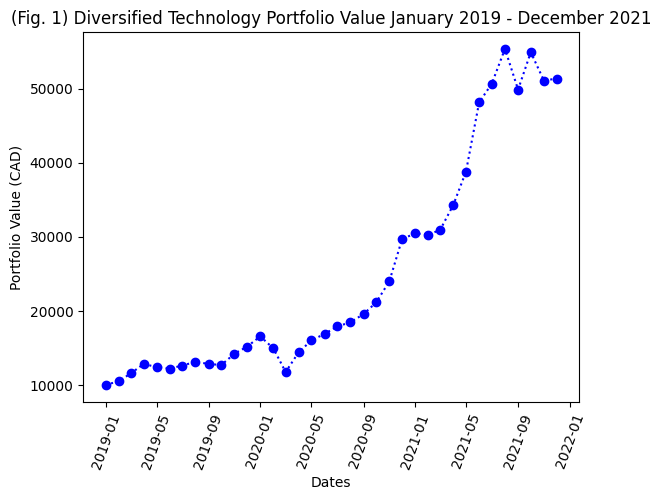

In [597]:
# Plot the Data
plt.plot(Portfolio.index, Portfolio.Portfolio_Value, marker='o', ls=':', color='b')

# Title and axes 
plt.title('(Fig. 1) Diversified Technology Portfolio Value January 2019 - December 2021')
plt.xlabel('Dates')
plt.ylabel('Portfolio Value (CAD)')

# Rotate x-axes by 70 degrees
plt.xticks(rotation=70)

plt.show()

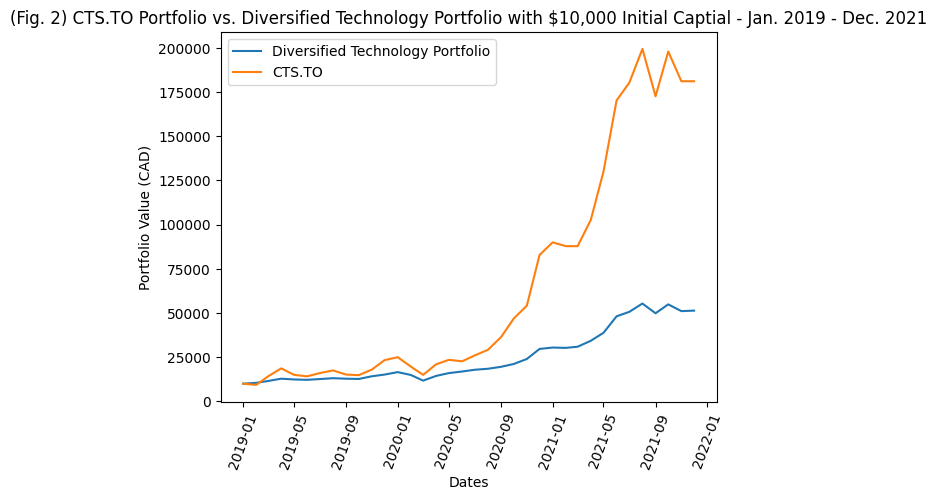

In [598]:
# Creating a Hypothetical Situation where all $10,000 was invested into one stock
sharesCTS = 10000/ctsdf.loc['2019-01-01', 'CTS.TO_Price']
ctsdf['Portfolio_Value'] = ctsdf['CTS.TO_Price'] * sharesCTS

# Plot the data
plt.plot(Portfolio.index, Portfolio.Portfolio_Value, label='Diversified Technology Portfolio')
plt.plot(ctsdf.index, ctsdf.Portfolio_Value, label='CTS.TO')

# Define label
plt.title('(Fig. 2) CTS.TO Portfolio vs. Diversified Technology Portfolio with $10,000 Initial Captial - Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Portfolio Value (CAD)')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

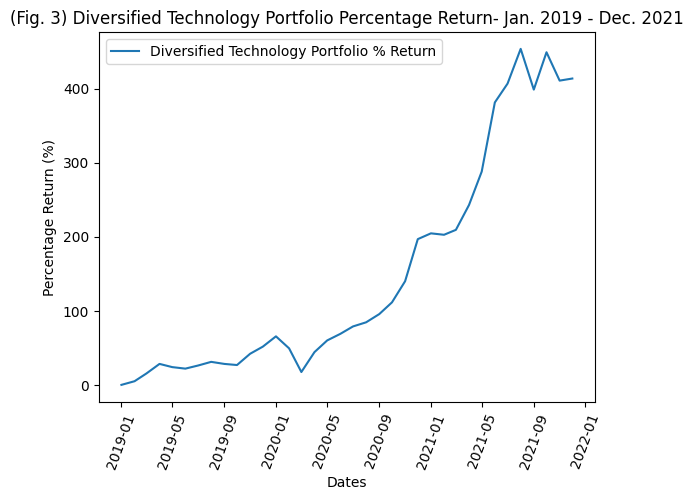

In [599]:
# Plot the Percentage Return data
plt.plot(Portfolio.index, Portfolio.Percentage_Return, label='Diversified Technology Portfolio % Return')

# Define label
plt.title('(Fig. 3) Diversified Technology Portfolio Percentage Return- Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Percentage Return (%)')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

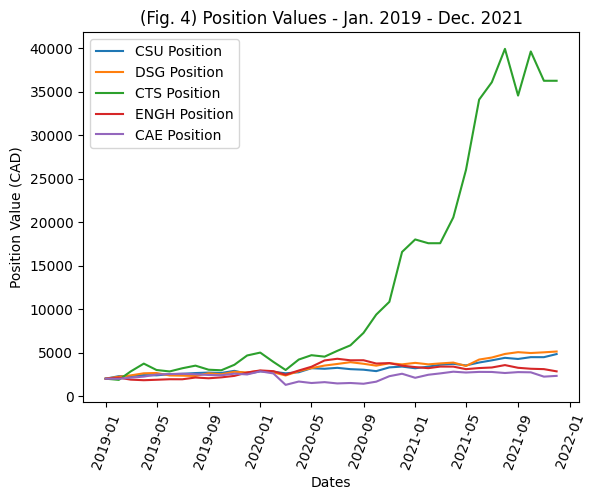

In [600]:
# Plot the Position Values of each stock
plt.plot(Portfolio.index, Portfolio.CSU_Position_Value, label='CSU Position')
plt.plot(Portfolio.index, Portfolio.DSG_Position_Value, label='DSG Position')
plt.plot(Portfolio.index, Portfolio.CTS_Position_Value, label='CTS Position')
plt.plot(Portfolio.index, Portfolio.ENGH_Position_Value, label='ENGH Position')
plt.plot(Portfolio.index, Portfolio.CAE_Position_Value, label='CAE Position')

# Define label
plt.title('(Fig. 4) Position Values - Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Position Value (CAD)')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

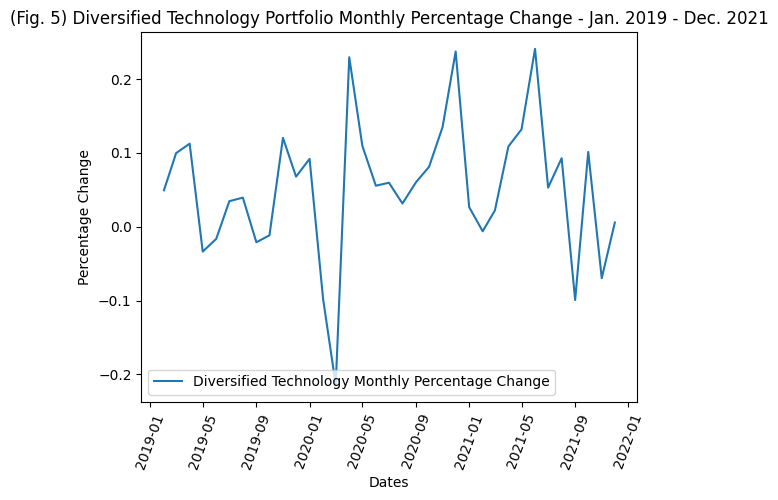

In [601]:
# Plot the Month over Month Percentage Change
plt.plot(Portfolio.index, Portfolio.Monthly_Percentage_Change, label='Diversified Technology Monthly Percentage Change')

# Define label
plt.title('(Fig. 5) Diversified Technology Portfolio Monthly Percentage Change - Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Percentage Change')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

In [602]:
# Calculating the Standard Deviation of the Diversified Portfolio
stdPortfolio = Portfolio['Portfolio_Value'].std()
print("The standard deviation of the diversified technology portfolio is: ", round(stdPortfolio, 2), sep='')

# Calculating the Standard Deviation of the Portfolio with only CTS.TO
stdCTS = ctsdf['Portfolio_Value'].std()
print("The standard deviation of CTS.TO only portfolio is: ", round(stdCTS, 2), sep='')

The standard deviation of the diversified technology portfolio is: 15151.68
The standard deviation of CTS.TO only portfolio is: 65809.93


### When considering the topic of Diversification in relation to Portfolio building it all comes down to one classic saying: "Don't put all your eggs in one basket". The entire point of diversifying your portfolio is to mitigate risk. If one asset in your portfolio losses value, having a diversified portfolio means that you shouldn't feel the affect of that drop in value too much. In this example, we were given the task of forming a portfolio out of five random stocks in the Technology industry. It's important to note that even though our portfolio contains multiple stocks, it isn't fully diversified, as it only contains stocks from one industry. This means that all of our positions will be positively correlated, as when there are changes in the market, our positions will react the same. This is because their value depends on the same factors. Even though our positions are positively correlated, the principle of diversification can still be outlined. 

### In Figure 2, a hypothetical scenerio was created where all of our intial capital was invested in just 1 stock, CTS.TO, vs. the Diversified Technology portfolio. We see that the portfolio containing just CTS.TO is extremely volatile. Although this portfolio had an excellent return in comparision to the Divsersified Technology Portfolio, the inverse could've also occured. When you have a portfolio containing only one stock, your entire portfolio is completely dependant one that one company. If that company falls into any trouble, then your entire portfolio will be in trouble. This is why diversification is so important. In a portfolio, you don't want it to be entirely dependant on one company. You want your capital to be spread out, in order to mitigate risk. A portfolio with only a few different holdings will also be much more volatile than a diversified portfolio. This can also be seen the our calculations of Standard Deviation. The CTS.TO only portfolio has a standard devation four times that of the diversified portfolio. A diversified portfolio has much less risk, and is much less volatile. As well as this, in times of market decline, a diversified portfolio will usually not lose quite as much value as portfolios with a limited amount of holdings. This makes the diversified portfolio the much more attractive option for the everyday investor. 

In [603]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b) Multi-Industry 
Repeating the procedure from above, form a portfolio of five random stocks for each of the 4 remaining industries.  Store them in separate DataFrames. 

You will now create a new multi-industry portfolio.  Beginning with your technology portfolio, combine each of the 4 remaining portfolios, one at a time, with the techology portfolio, such that every stock is equally weighted as before, with the investment size reminaing unchanged.  Track the change in portoflio standard deviation as you add industries in, and graph it after the full final portfolio is created (hint, that portfolio shold have 25 stock).  Discuss the role of inter-industry investments on diversification, your graph may be useful in the discussion, and if helpful, you can include calculations you deem illuminating. 

In [604]:
# Creating an equal weighting for each position
positionPerShare = capital/25

# Creating a function to calculate the Portfolio Value
def make_DataFrame (tickers):
    
    # Stores all close prices in a Dictionary
    prices = {}
    
    # Getting all of the historical data for each ticker
    for i in range(len(tickers)):
        ticker = yf.Ticker(tickers[i])
        prices[tickers[i]] = ticker.history(start='2019-01-01', end='2021-12-02', interval="1mo").Close
    
    # Storing all of the close prices in a df
    close_prices = pd.DataFrame(prices)
    close_prices = close_prices.dropna()
    
    # Stores all of the portfolio values in a dictionary
    portfolio = {}
    
    # Calculates the portfolio value
    for i in range(len(tickers)):
        portfolio[f"{tickers[i]} PV"] = ((positionPerShare / close_prices.iloc[:,i][0]) * close_prices.iloc[:,i])
    
    # Stores the Portfolio Value in a df
    Portfolio_Value = pd.DataFrame(portfolio)
    
    # returns that df
    return Portfolio_Value

In [605]:
# Getting the random tickers from the healthcare industry
tickersHealthcare = random_selection(pd.read_csv('industries.csv'), "Healthcare", 5, 21002933)
tickersHealthcare

['EXE.TO', 'ACB.TO', 'GUD.TO', 'CPH.TO', 'BHC.TO']

In [606]:
# Getting the random tickers from the industrials industry
tickersIndustrials = random_selection(pd.read_csv('industries.csv'), "Industrials", 5, 21002933)
tickersIndustrials

['AC.TO', 'WCN.TO', 'SNC.TO', 'WSP.TO', 'CNR.TO']

In [607]:
# Getting the random tickers from the energy industry
tickersEnergy = random_selection(pd.read_csv('industries.csv'), "Energy", 5, 21002933)
tickersEnergy

['CVE.TO', 'SU.TO', 'IPL.TO', 'IMO.TO', 'ENB.TO']

In [608]:
# Getting the random tickers from the financial services industry
tickersFinancialServices = random_selection(pd.read_csv('industries.csv'), "Financial Services", 5, 21002933)
tickersFinancialServices

['CM.TO', 'TD.TO', 'SLF.TO', 'BMO.TO', 'RY.TO']

In [609]:
# Creating a portfolio with the tech stocks
techPortfolio = make_DataFrame(tickers)

# Creating a portfolio with the healthcare stocks
healthcarePortfolio = make_DataFrame(tickersHealthcare)

# Creating a portfolio with the industrials stocks
industrialsPortfolio = make_DataFrame(tickersIndustrials)

# Creating a portfolio with the energy stocks
energyPortfolio = make_DataFrame(tickersEnergy)

# Creating a portfolio with the finacial services stocks
financialPortfolio = make_DataFrame(tickersFinancialServices)

# Concatenating all of the seperate DataFrames to create a fully diversified portfolio
IndustriesPortfolio = pd.concat([techPortfolio, healthcarePortfolio, industrialsPortfolio, energyPortfolio, financialPortfolio], join='inner', axis=1)

# Calculating total portfolio value
IndustriesPortfolio['Portfolio_Value'] = IndustriesPortfolio.sum(axis='columns')

# Dropping columns
IndustriesPortfolio = IndustriesPortfolio.drop(columns=['CSU.TO PV','DSG.TO PV','CTS.TO PV','ENGH.TO PV','CAE.TO PV','EXE.TO PV','ACB.TO PV','GUD.TO PV','CPH.TO PV','BHC.TO PV','AC.TO PV','WCN.TO PV','SNC.TO PV','WSP.TO PV','CNR.TO PV','CVE.TO PV','SU.TO PV','IPL.TO PV','IMO.TO PV','ENB.TO PV','CM.TO PV','TD.TO PV','SLF.TO PV','BMO.TO PV','RY.TO PV'])

# Calculating the percentage return of the portfolio
IndustriesPortfolio['Percentage_Return'] = 100 * (IndustriesPortfolio['Portfolio_Value']-capital)/capital

# Calculating the Month over Month Percentage Change
IndustriesPortfolio['Monthly_Percentage_Change'] = IndustriesPortfolio['Portfolio_Value'].pct_change()

IndustriesPortfolio.head()

,Portfolio_Value,Percentage_Return,Monthly_Percentage_Change
Date,,,
2019-01-01,10000.000000,0.000000,NaN
2019-02-01,10363.238779,3.632388,0.036324
2019-03-01,10547.405145,5.474051,0.017771
2019-04-01,11104.040901,11.040409,0.052775
2019-05-01,10618.081977,6.180820,-0.043764


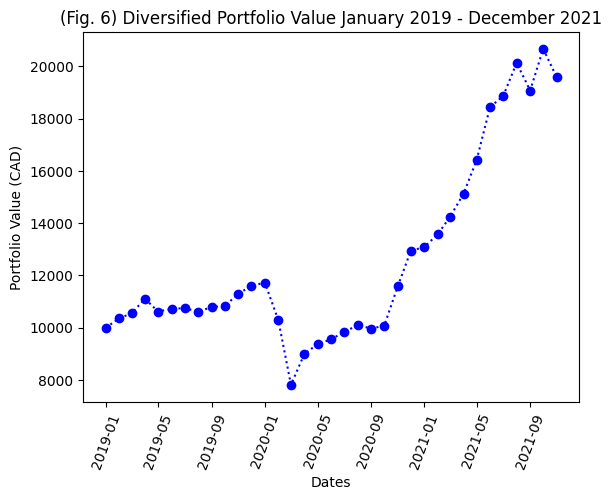

In [610]:
# Plot the Total Portfolio Value
plt.plot(IndustriesPortfolio.index, IndustriesPortfolio.Portfolio_Value, marker='o', ls=':', color='b')

# Title and axes 
plt.title('(Fig. 6) Diversified Portfolio Value January 2019 - December 2021')
plt.xlabel('Dates')
plt.ylabel('Portfolio Value (CAD)')

# Rotate x-axes by 70 degrees
plt.xticks(rotation=70)

plt.show()

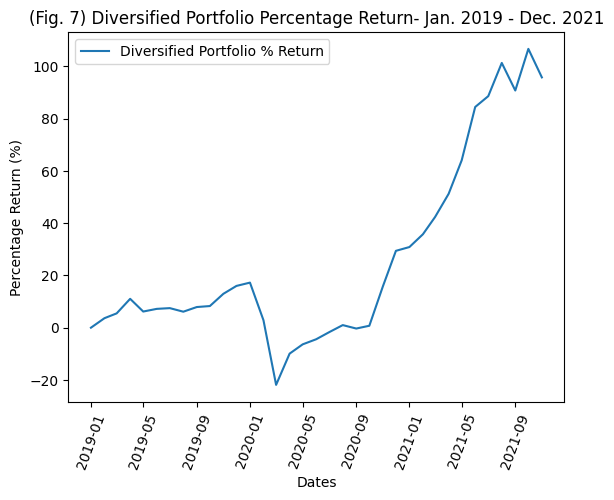

In [611]:
# Plot the Percentage Return
plt.plot(IndustriesPortfolio.index, IndustriesPortfolio.Percentage_Return, label='Diversified Portfolio % Return')

# Define label
plt.title('(Fig. 7) Diversified Portfolio Percentage Return- Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Percentage Return (%)')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

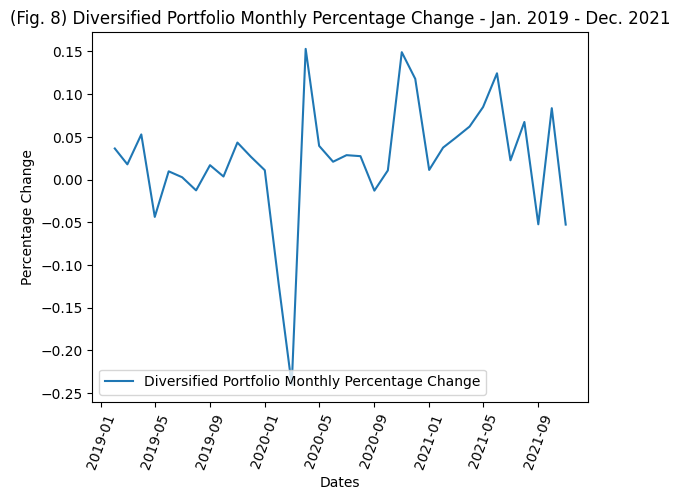

In [612]:
# Plot the Month over Month Percentage Change
plt.plot(IndustriesPortfolio.index, IndustriesPortfolio.Monthly_Percentage_Change, label='Diversified Portfolio Monthly Percentage Change')

# Define label
plt.title('(Fig. 8) Diversified Portfolio Monthly Percentage Change - Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Percentage Change')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

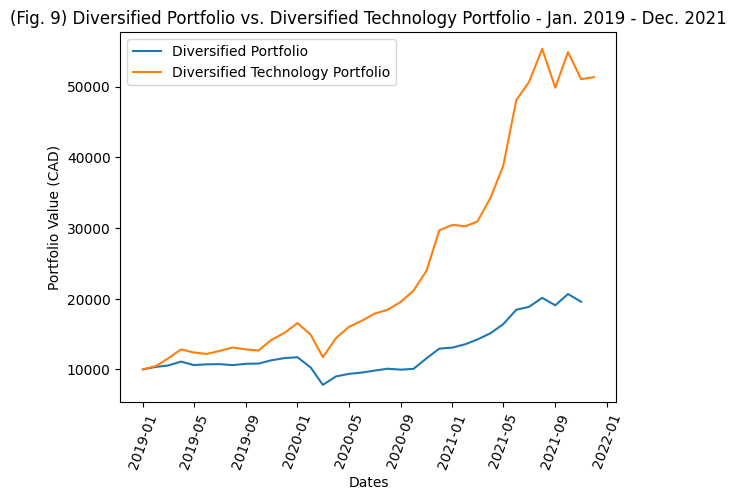

In [613]:
# Plot the Technology Portfolio vs. the Divsersified Portfolio
plt.plot(IndustriesPortfolio.index, IndustriesPortfolio.Portfolio_Value, label='Diversified Portfolio')
plt.plot(Portfolio.index, Portfolio.Portfolio_Value, label='Diversified Technology Portfolio')

# Define label
plt.title('(Fig. 9) Diversified Portfolio vs. Diversified Technology Portfolio - Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Portfolio Value (CAD)')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

In [614]:
# Calculating the Standard Deviation of the Portfolio's (added in one at a time)

# One Industry
stdPortfolio

# Two Industries
positionPerShare = capital/10
twoIndustries=make_DataFrame(tickers+tickersHealthcare)
twoIndustries['Portfolio_Value'] = twoIndustries.sum(axis='columns')
stdTwoIndustries = twoIndustries['Portfolio_Value'].std()

# Three Industries 
positionPerShare = capital/15
threeIndustries=make_DataFrame(tickers+tickersHealthcare+tickersIndustrials)
threeIndustries['Portfolio_Value'] = threeIndustries.sum(axis='columns')
stdThreeIndustries = threeIndustries['Portfolio_Value'].std()

# Four Industries 
positionPerShare = capital/20
fourIndustries=make_DataFrame(tickers+tickersHealthcare+tickersIndustrials+tickersEnergy)
fourIndustries['Portfolio_Value'] = fourIndustries.sum(axis='columns')
stdFourIndustries = fourIndustries['Portfolio_Value'].std()

# All five Industries
stdIndustriesPortfolio = IndustriesPortfolio['Portfolio_Value'].std()

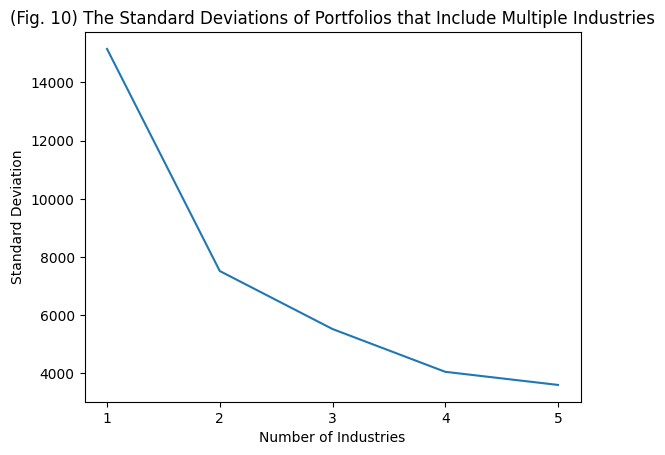

In [615]:
# Creating a DataFrame with all of the Standard Deviations
stds = pd.DataFrame({'NumIndustries': ['1','2','3','4','5'],
                    'STDs': [stdPortfolio, stdTwoIndustries, stdThreeIndustries, stdFourIndustries, stdIndustriesPortfolio]})

# Plot the data
plt.plot(stds.NumIndustries, stds.STDs)

# Define label
plt.title('(Fig. 10) The Standard Deviations of Portfolios that Include Multiple Industries')
plt.xlabel('Number of Industries')
plt.ylabel('Standard Deviation')

plt.show()

### Having investments in multple industries is often one of the best ways to achieve diversification in a portfolio. Changes in the economy and market affect industries differently. This means that by having holdings in multiple industries you reduce your risk, as your investments are spread out. If one industry fails, the growth in other industries will make up for that failure. This allows for a portfolio that can grow steadily over time, whilst minimizing risk. If a change in the market occurs, a portfolio that is spread out across industries will remain relatively stable. This is beacuse that change in the market will affect industries differently. Some industries will gain and some will lose. A portfolio that is truly diversified will absorb both the losses and gains, and will remain stable. The more industries you add to a portfolio the more stable it will become. This can be seen in Figure 8, where the standard deviations of portfolios of one, two, three, four, and five industries are compared. We can see that the more industries that are included in a portfolio, the lower the standard deviation. This means that portfolios with less industries, are more volatile (since they are less diversified). We can also see this in Figure 7, where the graph of a portfolio with solely technology stocks is compared against a portfolio with multple industries. The portfolio with multiple industries grows at a much more stable rate, and is predictable. It also has much less risk, since it's holdings spread out across multiple industries. Hence, it is the much more attractive choice for the everyday investor. 

In [616]:
%%latex
\newpage

<IPython.core.display.Latex object>

## Q2 Crypto Assets

### a)
In the same time period as Q1, form an equally weighted portfolio with $\$10,000$ containing Bitcoin (BTC-CAD) and Etherium (ETH-CAD).  If data isn't available early enough for both coins, start from whenever it is available (but end at the same date as the portfolio created above).   Comment on the diversification benefit of adding Etherium to Bitcoin holdings in a portfolio.  Perform whatever analysis you deem necessary to support your comments.



In [617]:
# Retrieving Data from Yahoo Finance
btc = yf.Ticker('BTC-CAD')
eth = yf.Ticker('ETH-CAD')

# Specifying a Start and End Date
start_date = '2019-01-01'
end_date = '2021-12-02'

# Getting Historical Data
btcHist = btc.history(start=start_date, end=end_date, interval="1mo")
ethHist = eth.history(start=start_date, end=end_date, interval="1mo")

# Formatting
btcHist.dropna(inplace=True)
ethHist.dropna(inplace=True)

# Creating our dataframes
btcdf = pd.DataFrame({'Date': btcHist.index.values,
                      'BTC_Price': btcHist.Close.values})

ethdf = pd.DataFrame({'Date': ethHist.index.values,
                      'ETH_Price': ethHist.Close.values})

# Formatting
btcdf.set_index('Date', inplace=True)
ethdf.set_index('Date', inplace=True)

# Creating a singular dataframe with all of our data
cryptoPortfolio = pd.concat([btcdf, ethdf], join='inner', axis=1)

# Creating an amount for our equally weighted portfolio 
amount = 10000/2

# Calculating the amount of crypto we can buy, given the equal weighting
numBTC = amount/cryptoPortfolio.loc['2019-01-01', 'BTC_Price']
numETH = amount/cryptoPortfolio.loc['2019-01-01', 'ETH_Price']

# Adding this to our DataFrame
cryptoPortfolio['Amount_BTC'] = numBTC
cryptoPortfolio['Amount_ETH'] = numETH

# Calculating our individual position values
cryptoPortfolio['BTC_Position_Value'] = cryptoPortfolio['BTC_Price'] * cryptoPortfolio['Amount_BTC']
cryptoPortfolio['ETH_Position_Value'] = cryptoPortfolio['ETH_Price'] * cryptoPortfolio['Amount_ETH']

# Adding them together to get a total portfolio value
cryptoPortfolio['Portfolio_Value'] = cryptoPortfolio['BTC_Position_Value'] + cryptoPortfolio['ETH_Position_Value']

# Calculating Percentage Return
cryptoPortfolio['Percentage_Return'] = 100 * (cryptoPortfolio['Portfolio_Value'] - capital)/capital

# Calculating the Month over Month Percentage Change
cryptoPortfolio['Monthly_Percentage_Change'] = cryptoPortfolio['Portfolio_Value'].pct_change()

cryptoPortfolio.head()

,BTC_Price,ETH_Price,Amount_BTC,Amount_ETH,BTC_Position_Value,ETH_Position_Value,Portfolio_Value,Percentage_Return,Monthly_Percentage_Change
Date,,,,,,,,,
2019-01-01,4540.254883,140.576462,1.10126,35.567832,5000.000000,5000.000000,10000.000000,0.000000,NaN
2019-02-01,5074.797852,180.025482,1.10126,35.567832,5588.670661,6403.116136,11991.786798,19.917868,0.199179
2019-03-01,5480.324707,188.907867,1.10126,35.567832,6035.261068,6719.043324,12754.304393,27.543044,0.063587
2019-04-01,7165.559570,217.168701,1.10126,35.567832,7891.142409,7724.219916,15615.362324,56.153623,0.224321
2019-05-01,11601.275391,362.756836,1.10126,35.567832,12776.017746,12902.474259,25678.492005,156.784920,0.644438


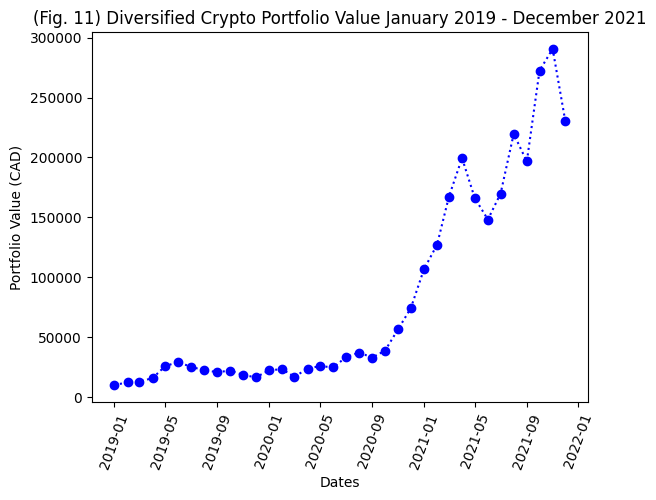

In [618]:
# Plot the Portfolio Value
plt.plot(cryptoPortfolio.index, cryptoPortfolio.Portfolio_Value, marker='o', ls=':', color='b')

# Title and axes 
plt.title('(Fig. 11) Diversified Crypto Portfolio Value January 2019 - December 2021')
plt.xlabel('Dates')
plt.ylabel('Portfolio Value (CAD)')

# Rotate x-axes by 70 degrees
plt.xticks(rotation=70)

plt.show()

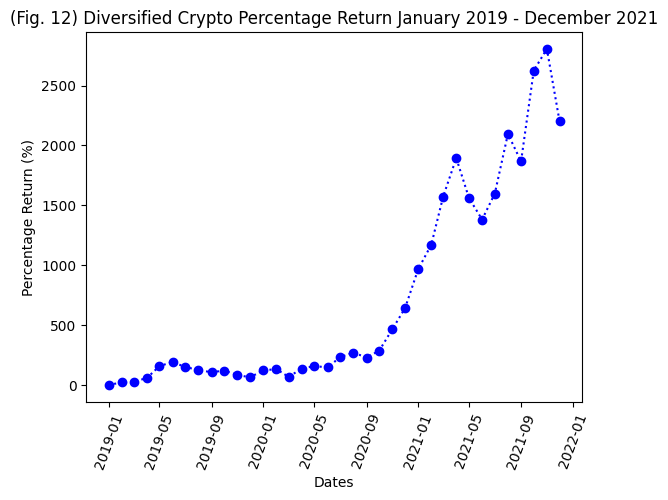

In [619]:
# Plot the Percentage Return
plt.plot(cryptoPortfolio.index, cryptoPortfolio.Percentage_Return, marker='o', ls=':', color='b')

# Title and axes 
plt.title('(Fig. 12) Diversified Crypto Percentage Return January 2019 - December 2021')
plt.xlabel('Dates')
plt.ylabel('Percentage Return (%)')

# Rotate x-axes by 70 degrees
plt.xticks(rotation=70)

plt.show()

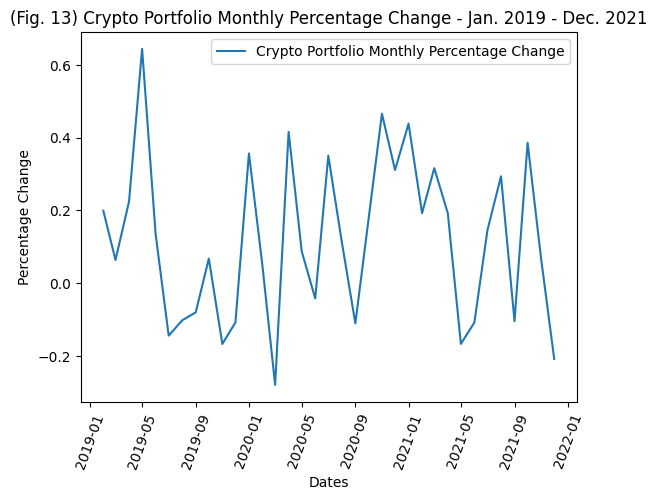

In [620]:
# Plot the Month over Month Percentage Change
plt.plot(cryptoPortfolio.index, cryptoPortfolio.Monthly_Percentage_Change, label='Crypto Portfolio Monthly Percentage Change')

# Define label
plt.title('(Fig. 13) Crypto Portfolio Monthly Percentage Change - Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Percentage Change')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

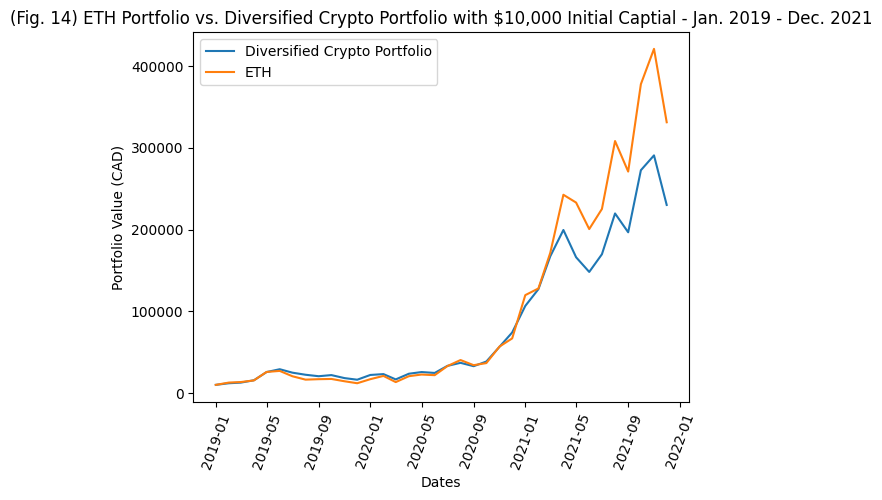

In [621]:
# Creating a Hypothetical Situation where all $10,000 was invested into only ETH
amountETH = 10000/ethdf.loc['2019-01-01', 'ETH_Price']
ethdf['Portfolio_Value'] = ethdf['ETH_Price'] * amountETH

# Plot the data
plt.plot(cryptoPortfolio.index, cryptoPortfolio.Portfolio_Value, label='Diversified Crypto Portfolio')
plt.plot(ethdf.index, ethdf.Portfolio_Value, label='ETH')

# Define label
plt.title('(Fig. 14) ETH Portfolio vs. Diversified Crypto Portfolio with $10,000 Initial Captial - Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Portfolio Value (CAD)')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

In [622]:
# Calculating the Standard Deviation of the Diversified Portfolio
stdCryptoPortfolio = cryptoPortfolio['Portfolio_Value'].std()
print("The standard deviation of the diversified crypto portfolio is: ", round(stdCryptoPortfolio, 2), sep='')

# Calculating the Standard Deviation of the Portfolio with only ETH
stdETH = ethdf['Portfolio_Value'].std()
print("The standard deviation of only ETH portfolio is: ", round(stdETH, 2), sep='')

The standard deviation of the diversified crypto portfolio is: 85368.13
The standard deviation of only ETH portfolio is: 121630.54


### When analyzing cryptocurrencies like Bitcoin and Etherium and their impact on diversifying a portfolio, we have to take into consideration that cryptocurrencies act differently than traditional assets. Stocks are a share of ownership in a company, whilst crypto is meant to be a currency. Hence, they react differently to changes in the market. As well as this, traditional assets and crypto are regulated much differently by the government. This means that crypto can act as diversification tool as it will react differently to both market changes, and government actions. We have seen in the past that in times of both market uncertainty and uncertainty in government that investors have turned to cryptocurrencies. In these situations, crypto has tended to fare better than traditional assets. This means that a portfolio containing both traditional assets and crypto will be extremely diversified, as if one position sustains some losses, then the other will be able to make up for it. This is not to say that they are negatively correlated, but that the two assets act differently to one another. Crypto allows for extended diversification for investors, in addition to industry diversification. 

### In addition to this, when talking about diversification in cryptocurrency, it's important to have multiple different coins, not only one. A singular cryptocurrency can be extremely volatile. If we have multiple coins in our portfolio, then we are able to mitigate risk. This is seen in Figure 11, where a portfolio containing only ETH is compared against a portfolio containing both BTC and ETH. ETH is highly volatile, but when combined with BTC, it decreased the volatility and risk.

### It is also important to note that even in a fully crypto portfolio, that the principle of diversification still applies. A crypto portfolio should be divided up amongst multple coins in order to minimize risk. Investing in a single coin has a lot of non-systematic risk. Meaning that if something occurs to that specific coin, then a portfolio containing only that coin will be impacted heavily. This is why investing in multiple coins is essential to mitigate risk.

In [623]:
%%latex
\newpage

<IPython.core.display.Latex object>

### b)
Combine your portfolio in (a) of this question, with the portfolio of 25 stocks you created in question 1.  Your new portfolio will be equally weighted between the two portfolios, i.e., you will invest $\$5000$ in the cyrpto portfolio and $\$5000 in the inter-industy porfolio from question 1.  Discuss the total risk of the portfolio.

In [624]:
# Setting an amount of each crypto holding
amount = 5000/2

# Calculating the amount of crypto we can buy, given the equal weighting
numBTC = amount/cryptoPortfolio.loc['2019-01-01', 'BTC_Price']
numETH = amount/cryptoPortfolio.loc['2019-01-01', 'ETH_Price']

# Adding this to our DataFrame
cryptoPortfolio['Amount_BTC'] = numBTC
cryptoPortfolio['Amount_ETH'] = numETH

# Calculating our individual position values
cryptoPortfolio['BTC_Position_Value'] = cryptoPortfolio['BTC_Price'] * cryptoPortfolio['Amount_BTC']
cryptoPortfolio['ETH_Position_Value'] = cryptoPortfolio['ETH_Price'] * cryptoPortfolio['Amount_ETH']

# Adding them together to get a total portfolio value
cryptoPortfolio['Portfolio_Value'] = cryptoPortfolio['BTC_Position_Value'] + cryptoPortfolio['ETH_Position_Value']

# Creating a list of all tickers in the Portfolio
alltickers = tickers + tickersHealthcare + tickersFinancialServices + tickersIndustrials + tickersEnergy

# Setting a new amount for capital
capital = 5000

# Setting a position value for each stock
positionPerShare = capital/25

# Making a DataFrame with all of the stocks, and their position values
halfPortfolio = make_DataFrame(alltickers)

# Total Portfolio Value of Stock section
halfPortfolio['Stocks_PV'] = halfPortfolio.sum(axis='columns')

# Concatenating the crypto portfolio and stock portfolio
DivPortfolio = pd.concat([halfPortfolio, cryptoPortfolio], join='inner', axis=1)

# Dropping Columns
DivPortfolio = DivPortfolio.drop(columns=['CSU.TO PV','DSG.TO PV','CTS.TO PV','ENGH.TO PV','CAE.TO PV','EXE.TO PV','ACB.TO PV','GUD.TO PV','CPH.TO PV','BHC.TO PV','AC.TO PV','WCN.TO PV','SNC.TO PV','WSP.TO PV','CNR.TO PV','CVE.TO PV','SU.TO PV','IPL.TO PV','IMO.TO PV','ENB.TO PV','CM.TO PV','TD.TO PV','SLF.TO PV','BMO.TO PV','RY.TO PV'])
DivPortfolio = DivPortfolio.drop(columns=['BTC_Price', 'ETH_Price', 'Amount_BTC', 'Amount_ETH', 'BTC_Position_Value', 'ETH_Position_Value'])

# Adding the Stocks Value to the crypto value to make a total portfolio value
DivPortfolio['Total_Portfolio_Value'] = DivPortfolio['Stocks_PV'] + DivPortfolio['Portfolio_Value']

# Dropping columns
DivPortfolio = DivPortfolio.drop(columns=['Stocks_PV', 'Portfolio_Value'])

# Calculating Percentage Return
DivPortfolio['Percentage_Return'] = 100*(DivPortfolio['Total_Portfolio_Value'] - 10000)/10000

# Calculating the Month over Month Percentage Change
DivPortfolio['Monthly_Percentage_Change'] = DivPortfolio['Total_Portfolio_Value'].pct_change()

DivPortfolio.head()

,Percentage_Return,Monthly_Percentage_Change,Total_Portfolio_Value
Date,,,
2019-01-01,0.000000,NaN,10000.000000
2019-02-01,11.775126,0.117751,11177.512645
2019-03-01,16.508547,0.042348,11650.854669
2019-04-01,33.597016,0.146671,13359.701615
2019-05-01,81.482869,0.358435,18148.286912


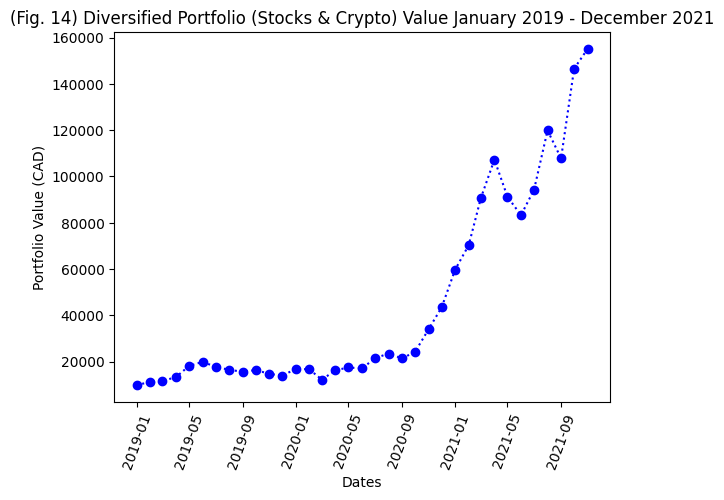

In [625]:
# Plot the Portfolio Value
plt.plot(DivPortfolio.index, DivPortfolio.Total_Portfolio_Value, marker='o', ls=':', color='b')

# Title and axes 
plt.title('(Fig. 14) Diversified Portfolio (Stocks & Crypto) Value January 2019 - December 2021')
plt.xlabel('Dates')
plt.ylabel('Portfolio Value (CAD)')

# Rotate x-axes by 70 degrees
plt.xticks(rotation=70)

plt.show()

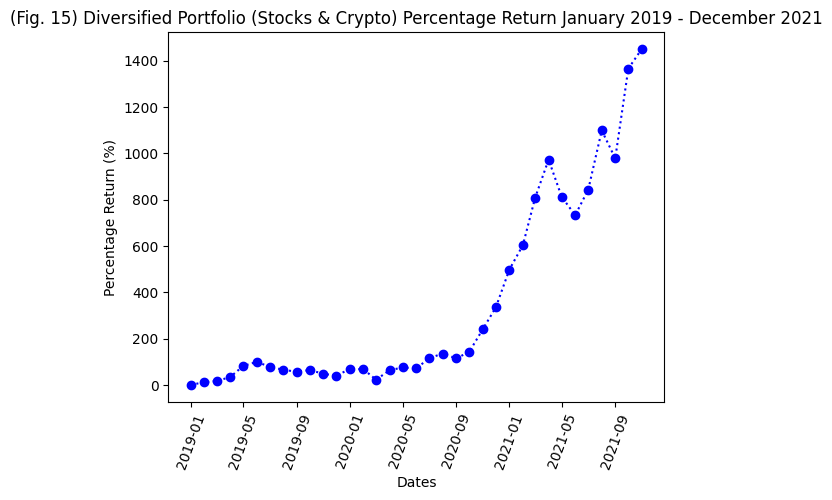

In [626]:
# Plot the Percentage Returen
plt.plot(DivPortfolio.index, DivPortfolio.Percentage_Return, marker='o', ls=':', color='b')

# Title and axes 
plt.title('(Fig. 15) Diversified Portfolio (Stocks & Crypto) Percentage Return January 2019 - December 2021')
plt.xlabel('Dates')
plt.ylabel('Percentage Return (%)')

# Rotate x-axes by 70 degrees
plt.xticks(rotation=70)

plt.show()

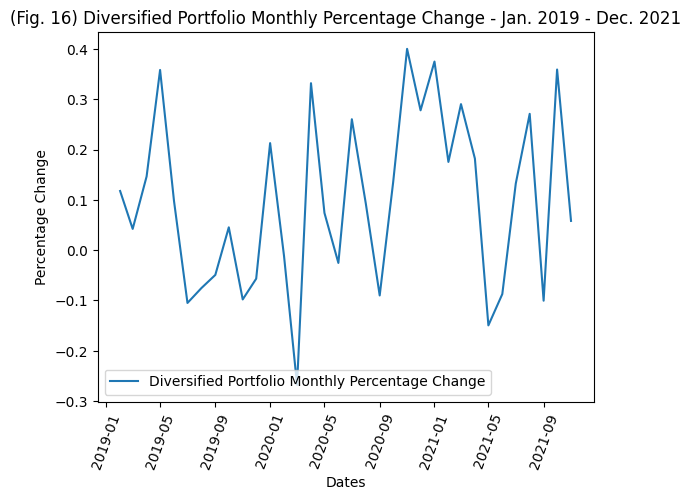

In [627]:
# Plot the Month over Month Percentage Change
plt.plot(DivPortfolio.index, DivPortfolio.Monthly_Percentage_Change, label='Diversified Portfolio Monthly Percentage Change')

# Define label
plt.title('(Fig. 16) Diversified Portfolio Monthly Percentage Change - Jan. 2019 - Dec. 2021')
plt.xlabel('Dates')
plt.ylabel('Percentage Change')
plt.xticks(rotation=70)

# Create legend
plt.legend(loc='best')

plt.show()

In [628]:
# Calculating Standard Deviations

print("The standard deviation of the diversified Crypto portfolio is: ", round(stdCryptoPortfolio, 2), sep='')

print("The standard deviation of the diversified Industries portfolio is: ", round(stdIndustriesPortfolio, 2), sep='')

stdDivPortfolio = DivPortfolio['Total_Portfolio_Value'].std()

print("The standard deviation of the diversified Crypto & Stocks portfolio is: ", round(stdDivPortfolio, 2), sep='')

The standard deviation of the diversified Crypto portfolio is: 85368.13
The standard deviation of the diversified Industries portfolio is: 3607.44
The standard deviation of the diversified Crypto & Stocks portfolio is: 43024.84


### In this portfolio, which contains both cryptocurrencies and stocks from multiple industries, it is very diversified. The only significant risk that I see with this portfolio is the weighting it has for the specific holdings. Currently this portfolio is 50% crypto and 50% stocks. The cryptocurrency market is very volatile, and this portfolio would be significantly affected by the volatility of the crypto market. We also see this in the standard deviation of the portfolio. The standard deviation of this portfolio is roughly half-way in between the portfolio's of fully crypto and fully stocks. For the average investor, this portfolio is quite volatile. To decrease the volatility of this portfolio, and to decrease risk, the best action would be to change the weighting of the holdings. For the average investor, a weighting of 75% stocks and 25% crypto would be much more suitable. This takes advantage of the increased diversification that crypto provides, whilst also mitigating risk. Crypto is a very useful diversification tool in a portfolio, but it also comes with drawbacks. This is why an appropriate weighting must be set to mitigate risk. 

In [629]:
%%latex
\newpage

<IPython.core.display.Latex object>

### c)
Instead of assuming equal weight on the cyrpto and inter-industry portfolio, you now must determine what is the optimal weight on each portfolio if your goal is to maximize the portfolio sharpe ratio, $S=\frac{R_P-R_f}{\sigma_P}$. Where S is the sharpe ratio, $R_P$ is the expected return of the portfolio, found by taking a simple arithmetic average, $R_f$ is the risk-free rate, and $\sigma_P$ is the standard deviation of portfolio returns.  To make things easier, we will assume the risk-free rate is zero, since these days it is close enough to zero anyways.

To perform this analysis, you should use a for loop, and iterate over the integers from 0 to 100, which will represent the weights.  Thus, we are simplying things so that you only have to compare 100 portfolios.

You should make sure to print out the optimal weights, and discuss why an investor may wish to invest in this fashion.

In [635]:
# Creating a for loop to create 100 portfolios
for i in range(101):
    
    # Setting a weighted amount for the stock portion of the portfolio
    amount = 10000*((100-i)/100)
    
    # Setting a position value, dependant on the weighted amount
    positionPerShare = amount/25
    
    # Creating a stocks DataFrame
    stocksPortion = make_DataFrame(alltickers)
    
    # Setting a weighted amount for the crypto portion of the portfolio
    amount = 10000*(i/100)
    
    # Setting a position value, dependant on the weighted amount
    positionPerShare = amount/2
    
    # Creating a crypto DataFrame
    cryptoPortion = make_DataFrame(['BTC-CAD', 'ETH-CAD'])
    
    # Concatenating the two portfolios to create a total portfolio
    TotalPortfolio = pd.concat([stocksPortion, cryptoPortion], join='inner', axis=1)
    
    # Calculating the Portfolio Value
    TotalPortfolio['Portfolio_Value'] = TotalPortfolio.sum(axis='columns')
    
    # Calculating the Month over Month Percentage 
    TotalPortfolio['Pct_Change'] = TotalPortfolio['Portfolio_Value'].pct_change()
    
    # Dropping the first N/A value
    TotalPortfolio.dropna(inplace=True)
    
    # Calculating the Standard Devaiation of the monthly percentage change
    stdTotalPortfolio = TotalPortfolio['Pct_Change'].std()
    
    # Calculating the mean of the monthly percentage change, which is our expected return
    expReturn = TotalPortfolio['Pct_Change'].mean()
    
    # Calculating the Sharpe Ratio
    SharpeRatio = expReturn/stdTotalPortfolio
    
    # Storing all of the Sharpe Ratio's and Weighting's in a list
    
    # The first number is the percentage weighting in Stocks, the second is the percentage weighting in crypto, third is the Sharpe Ratio
    value = (f"{(100-i)}, {(i)}, {SharpeRatio}")
    
    print(value)

100, 0, 0.3103443349585497
99, 1, 0.35809226218855705
98, 2, 0.39467652850628876
97, 3, 0.4186831235883276
96, 4, 0.4378363716021021
95, 5, 0.4525356608506641
94, 6, 0.46414383435920037
93, 7, 0.47356021597998926
92, 8, 0.4813858390769586
91, 9, 0.48802718445765886
90, 10, 0.4937646606676998
89, 11, 0.49879601021046016
88, 12, 0.5032635448801239
87, 13, 0.5072719726736843
86, 14, 0.5108998145791975
85, 15, 0.5142071021906485
84, 16, 0.5172405258172891
83, 17, 0.5200370659409552
82, 18, 0.5226263826812138
81, 19, 0.5250326750331985
80, 20, 0.5272759232289
79, 21, 0.5293728180313628
78, 22, 0.5313374672404899
77, 23, 0.5331819240617673
76, 24, 0.5349165464036013
75, 25, 0.5365503990049526
74, 26, 0.5380913373692566
73, 27, 0.5395463843442159
72, 28, 0.5409180363548474
71, 29, 0.5427465599460551
70, 30, 0.5439604523487939
69, 31, 0.5451103731791246
68, 32, 0.5457282553560249
67, 33, 0.5467777274535809
66, 34, 0.5477735971131463
65, 35, 0.5487189657761861
64, 36, 0.5496166986618551
63, 37,

In [637]:
print("Optimal Weightings: 11% Stocks, 89% Crypto.")

Optimal Weightings: 11% Stocks, 89% Crypto.


### Using the Sharpe Ratio is very useful when evaluating an investment in terms of its return in relation to the amount of risk it holds. The Sharpe Ratio allows us to compare investments to each other by making them into a simple ratio. The higher the Sharpe Ratio, the better the investment. In this scenario, where we evaluate portfolios with different weightings of crypto and stock holdings, I found that the portfolio which had the highest Sharpe Ratio was one that had 11% of its holdings in stocks and 89% of its holdings in crypto. An investor might want to invest in this combination because based on its level of risk, and its returns it is the most attractice investment (as per the Sharpe Ratio). Diving deeper, we can infer that crypto, while its returns are very high, it also holds a significant amount of risk. We can see this in the crypto portfolio's montly percentage returns, as they vary by a large amount. A portfolio made up of entirely crypto, whilst it's returns are high, it is very risky. This is why an entirely crypto portfolio is not ideal. A fully stock portfolio suffers from the opposite problem. Whilst it is very safe, it's returns aren't high enough to make it an incredibly attractive portfolio. This is why a portfolio of the combination of the two types of assets is best. We want to take advantage of the high returns of crypto, whilst also incorporating stock holdings to minimize risk. As stated previously, my findings are that a portfolio containing 11% of its holdings in stocks and 89% of its holdings in crypto is the optimal portfolio when taking into account returns and risk. In theory, this portfolio is the most attractive to investors as it has the highest Sharpe Ratio, and has the optimal amount of returns in regards to risk.